# Binomial Asset Pricing Model - Choosing Parameters

<b> YouTube Tutorial </b> (Published: Jul 16, 2021): https://youtu.be/nWslah9tHLk

Implementation of a simple slow and fast binomial pricing model in python. We will treat binomial tree as a network with nodes (i,j) with i representing the time steps and j representing the number of ordered price outcome (lowest - or bottom of tree - to highest).

We will be implementing the following for the binomial_tree_slow algorithm:
- Cox, Ross and Rubinstein (CRR)
- Jarrow and Rudd (JR)
- Equal probabilities (EQP)
- Trigeorgis (TRG)

But will work for
- binomial_tree_fast


In [ ]:
import numpy as np

### Binomial Tree Representation

Stock tree can be represented using nodes (i,j) and intial stock price $S_0$

$S_{i,j} = S_0u^{j}d^{i-j}$

$C_{i,j}$ represents contract price at each node (i,j). Where $C_{N,j}$ represents final payoff function that we can define.

For this tutorial will will price a European Call, so $C_{N,j} = max(S_{N,j}-K,0)$

In [ ]:
# Initialise parameters
S0 = 100      # initial stock price
K = 110       # strike price
T = 0.5       # time to maturity in years
r = 0.06      # annual risk-free rate
N = 100       # number of time steps
sigma = 0.3   # Annualised stock price volatility
opttype = 'C' # Option Type 'C' or 'P'

### Cox, Ross and Rubinstein (CRR) Method

Here we choose equal jump sizes

In [ ]:
def CRR_method(K,T,S0,r,N,sigma,opttype='C'):
    #precomute constants
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    q = (np.exp(r*dt) - d) / (u-d)
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*d**N
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d

    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        if opttype == 'C':
            C[j] = max(0, S[j]-K)
        else:
            C[j] = max(0, K - S[j])

    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )

    return C[0]

CRR_method(K,T,S0,r,N,sigma,opttype='C')

5.77342630682585

### Jarrow and Rudd (JR) Method

Here we choose equal risk-neutral probabilities

In [ ]:
def JR_method(K,T,S0,r,N,sigma,opttype='C'):
    #precomute constants
    dt = T/N
    nu = r - 0.5*sigma**2
    u = np.exp(nu*dt + sigma*np.sqrt(dt))
    d = np.exp(nu*dt - sigma*np.sqrt(dt))
    q = 0.5
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*d**N
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d

    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        if opttype == 'C':
            C[j] = max(0, S[j]-K)
        else:
            C[j] = max(0, K - S[j])

    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )

    return C[0]

JR_method(K,T,S0,r,N,sigma,opttype='C')

5.754089414567556

### Equal Probabilities (EQP) Method

Here we choose equal risk-neutral probabilities, under logarithmic asset pricing tree

In [ ]:
def EQP_method(K,T,S0,r,N,sigma,opttype='C'):
    #precomute constants
    dt = T/N
    nu = r - 0.5*sigma**2
    dxu = 0.5*nu*dt + 0.5*np.sqrt(4*sigma**2 * dt - 3*nu**2 * dt**2)
    dxd = 1.5*nu*dt - 0.5*np.sqrt(4*sigma**2 * dt - 3*nu**2 * dt**2)
    pu = 0.5
    pd = 1-pu
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*np.exp(N*dxd)
    for j in range(1,N+1):
        S[j] = S[j-1]*np.exp(dxu - dxd)

    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        if opttype == 'C':
            C[j] = max(0, S[j]-K)
        else:
            C[j] = max(0, K - S[j])

    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( pu*C[j+1] + pd*C[j] )

    return C[0]

EQP_method(K,T,S0,r,N,sigma,opttype='C')

5.7365844788666545

### Trigeorgis (TRG) Method

Here we choose equal jump sizes, under logarithmic asset pricing tree

In [ ]:
def TRG_method(K,T,S0,r,N,sigma,opttype='C'):
    #precomute constants
    dt = T/N
    nu = r - 0.5*sigma**2
    dxu = np.sqrt(sigma**2 * dt + nu**2 * dt**2)
    dxd = -dxu
    pu = 0.5 + 0.5*nu*dt/dxu
    pd = 1-pu
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*np.exp(N*dxd)
    for j in range(1,N+1):
        S[j] = S[j-1]*np.exp(dxu - dxd)

    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        if opttype == 'C':
            C[j] = max(0, S[j]-K)
        else:
            C[j] = max(0, K - S[j])

    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( pu*C[j+1] + pd*C[j] )

    return C[0]

TRG_method(K,T,S0,r,N,sigma,opttype='C')

5.773359020180677

### Comparision of Methods

Now we will compare convergence as function of time steps

In [ ]:
!pip install py_vollib

     |████████████████████████████████| 130 kB 7.0 MB/s 
  Created wheel for py-vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62855 sha256=cba1b7bb636df353a82c9a92bc3990bbd72d42f62c597af300658cd82f4effe0
  Stored in directory: /root/.cache/pip/wheels/2d/25/50/bc80b93c9a827ed9bef9d86f85365e1934bcbc0666b9f00c11
  Created wheel for py-lets-be-rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24468 sha256=8fac9f4783430237c659725061b7938e79c96d9de90a1ab2dec0ea54decc681d
  Stored in directory: /root/.cache/pip/wheels/1a/70/10/bf54a16badc528594c9510ef517badb765a29b651ea5652898
Successfully built py-vollib py-lets-be-rational


In [ ]:
from py_vollib.black_scholes import black_scholes as bs
import matplotlib.pyplot as plt

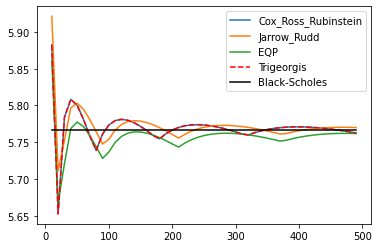

In [ ]:
## call option with different steps
CRR, JR, EQP, TRG = [],[],[],[]

periods = range(10,500,10)
for N in periods:
    CRR.append(CRR_method(K,T,S0,r,N,sigma,opttype='C'))
    JR.append(JR_method(K,T,S0,r,N,sigma,opttype='C'))
    EQP.append(EQP_method(K,T,S0,r,N,sigma,opttype='C'))
    TRG.append(TRG_method(K,T,S0,r,N,sigma,opttype='C'))

BS = [bs('c', S0, K, T, r, sigma) for i in periods]

plt.plot(periods, CRR, label='Cox_Ross_Rubinstein')
plt.plot(periods, JR, label='Jarrow_Rudd')
plt.plot(periods, EQP, label='EQP')
plt.plot(periods, TRG, 'r--',label='Trigeorgis')
plt.plot(periods, BS, 'k',label='Black-Scholes')
plt.legend(loc='upper right')
plt.show()